In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Binary Image')

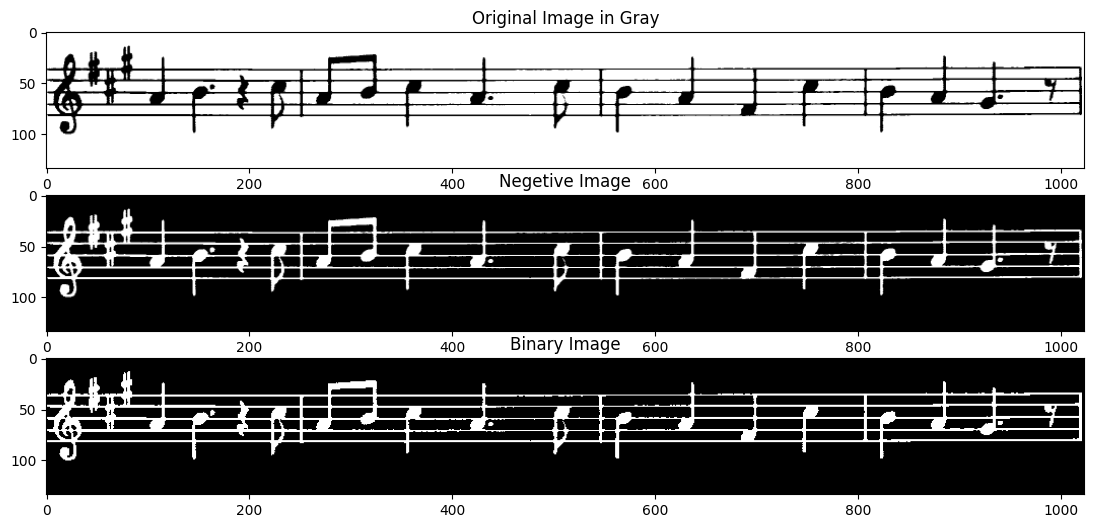

In [3]:
gray_image = cv.imread(r"D:\Opencv\class.vision-master\images\notes.png", 0)
negetive_image = cv.bitwise_not(gray_image)
binary_image = cv.adaptiveThreshold(negetive_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)

plt.figure(figsize=[17,6])
plt.subplot(311);plt.imshow(gray_image, cmap='gray');plt.title("Original Image in Gray")
plt.subplot(312);plt.imshow(negetive_image, cmap='gray');plt.title("Negetive Image")
plt.subplot(313);plt.imshow(binary_image, cmap='gray');plt.title("Binary Image")


In [4]:
cols = binary_image.shape[1]
horizental_size = cols//30

horizentalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizental_size, 1))
print(horizentalStructure)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Text(0.5, 1.0, 'horizental lines in image')

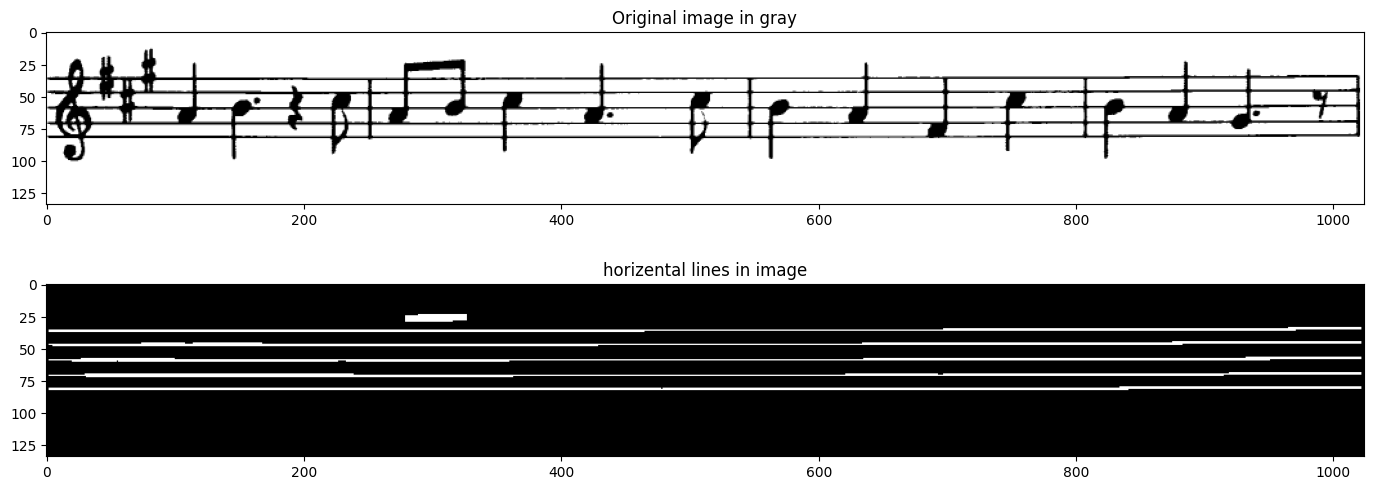

In [6]:
horizental = cv.morphologyEx(binary_image, cv.MORPH_OPEN, horizentalStructure)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray")
plt.subplot(212);plt.imshow(horizental, cmap='gray');plt.title("horizental lines in image")


In [7]:
rows = gray_image.shape[0]
verticalsize = rows // 30

verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
print(verticalStructure)

[[1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Vertical')

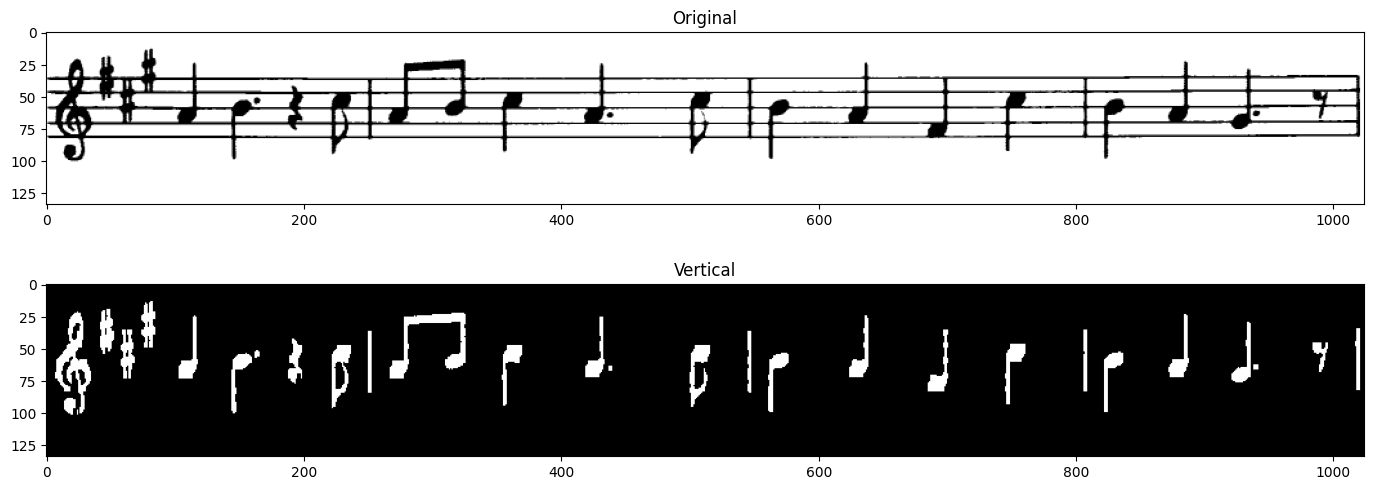

In [10]:
vertical = cv.morphologyEx(binary_image, cv.MORPH_OPEN, verticalStructure)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title("Original")
plt.subplot(212);plt.imshow(vertical, cmap='gray');plt.title("Vertical")

Text(0.5, 1.0, 'Raw result')

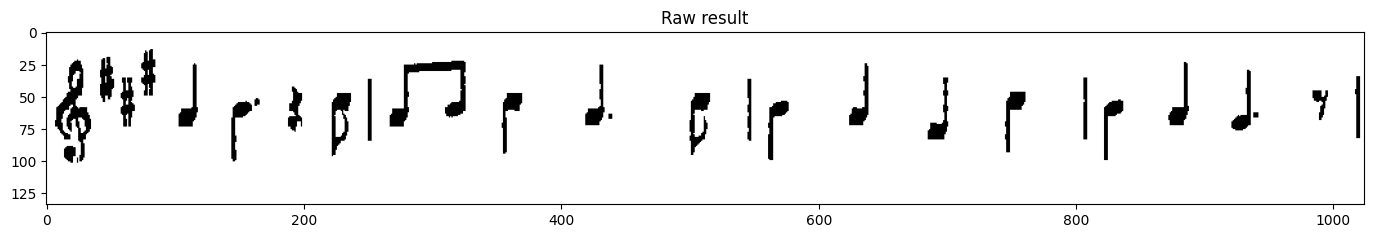

In [11]:
raw_result = cv.bitwise_not(vertical)

plt.figure(figsize=[17,6])
plt.imshow(raw_result, cmap='gray');plt.title("Raw result")

Text(0.5, 1.0, 'Edges')

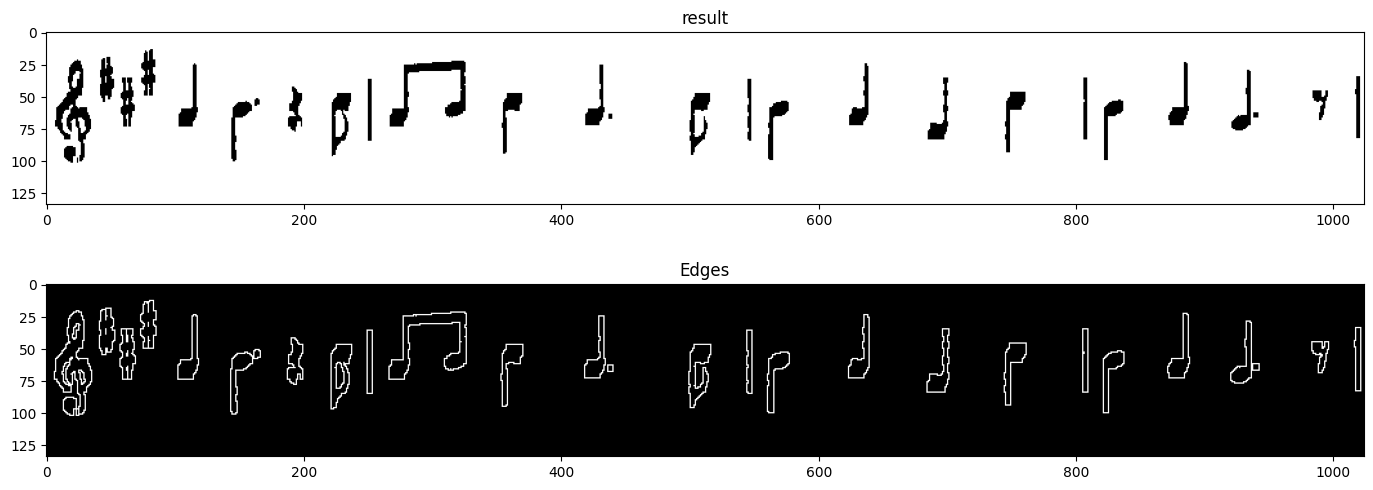

In [12]:
edges = cv.adaptiveThreshold(raw_result, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, -2)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(raw_result, cmap='gray');plt.title("result")
plt.subplot(212);plt.imshow(edges, cmap='gray');plt.title("Edges")

Text(0.5, 1.0, 'dilated edges')

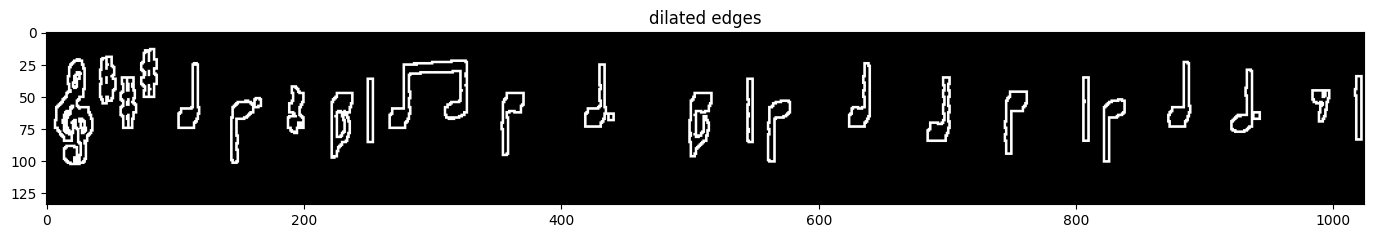

In [13]:
kernel = np.ones((2,2), np.uint8)
edges = cv.dilate(edges, kernel)
plt.figure(figsize=[17,6])
plt.imshow(edges, cmap='gray');plt.title("dilated edges")

Text(0.5, 1.0, 'Smooth')

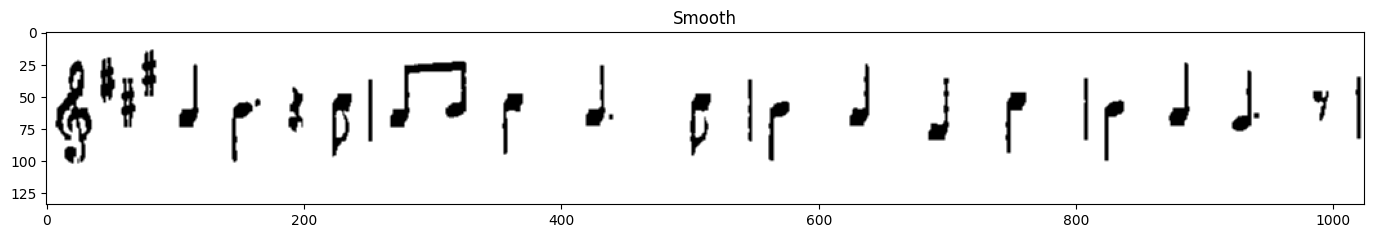

In [14]:
smooth = cv.blur(raw_result, (2,2))
plt.figure(figsize=[17,6])
plt.imshow(smooth, cmap='gray');plt.title("Smooth")

In [15]:
(raws, cols) = np.where(edges != 0)
final_result = np.copy(raw_result)
final_result[rows, cols] = smooth[rows, cols]
plt.figure(figsize=[18,11])
plt.subplot(411);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray");
plt.subplot(412);plt.imshow(raw_result, cmap='gray');plt.title("Raw result");
plt.subplot(413);plt.imshow(smooth, cmap='gray');plt.title("smoothed version");
plt.subplot(414);plt.imshow(final_result, cmap='gray');plt.title("Final result");

IndexError: index 134 is out of bounds for axis 0 with size 134